# K-Nearest Neighbors - KNN

- O objetivo deste projeto é desenvolver um algoritmo baseado em k-Nearest Neighbors (k-NN), também conhecido como 'algoritmo do vizinho mais próximo', para classificar o perfil de investidor de clientes de uma empresa de investimentos. A ideia é utilizar os dados de clientes já classificados para estimar o perfil daqueles que ainda não foram categorizados. **Os clientes são classificados como investidores Conservadores, Moderados ou Agressivos. Para desenvolver este projeto, não podemos utilizar nenhuma biblioteca com numpy ou math.**

### Resumo sobre KNN
- O processo de classificação usando o algoritmo k-Nearest Neighbors (k-NN) envolve calcular a distância entre o exemplo desconhecido e os exemplos no conjunto de treinamento. 
- A fórmula comumente usada para calcular a distância entre estes dados(pontos) é a Distância Euclidiana. Se tivermos dois pontos: A(x1,y1,z1,…) e B(x2,y2,z2,…) a distância euclidiana entre esses pontos é dada por:
Distância Euclidiana= √(x2−x1)² +(y2−y1)² +(z2−z1)² +…
- Esse cálculo de distância é realizado entre o exemplo desconhecido e todos os exemplos no conjunto de treinamento. 
- Posteriormente, os exemplos do conjunto de treinamento são classificados com base nessas distâncias, identificando assim os k vizinhos mais próximos. 
- A classe desconhecida é determinada considerando a classe mais frequente entre esses k vizinhos mais próximos.  

- **A ilustração abaixo exemplifica esse comportamento:**
    - 1 vizinho mais próximo, portanto, classificado como vermelho;
    - 3 vizinhos mais próximos, logo, classificado como azul, pois é a classe mais frequente no conjunto dos vizinhos mais próximos.
    - Com 4 vizinhos mais próximos, não é possível realizar uma classificação adequada.
    
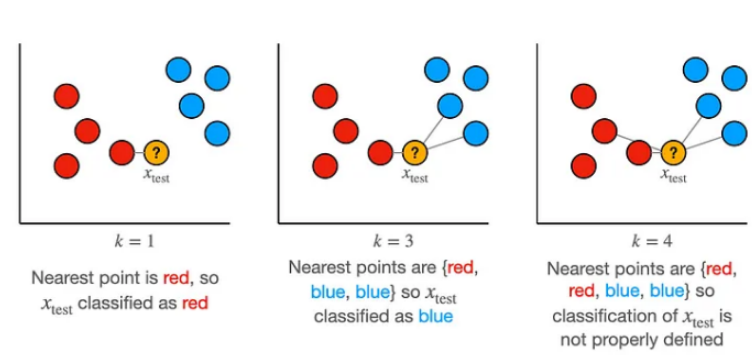

- É essencial destacar que o conceito de 'vizinho mais próximo' não se limita a um único ponto de dado, mas abrange uma região. Essa região, conhecida como **célula de Voronoi**, agrupa pontos de dados que estão mais próximos uns dos outros em relação aos demais pontos do conjunto. Ao atribuirmos uma classificação a um novo ponto de dados, consideramos toda a região da célula de Voronoi em que ele se encontra. Cada célula de Voronoi representa uma região onde os pontos compartilham a mesma classe, formando agrupamentos com base na proximidade espacial.

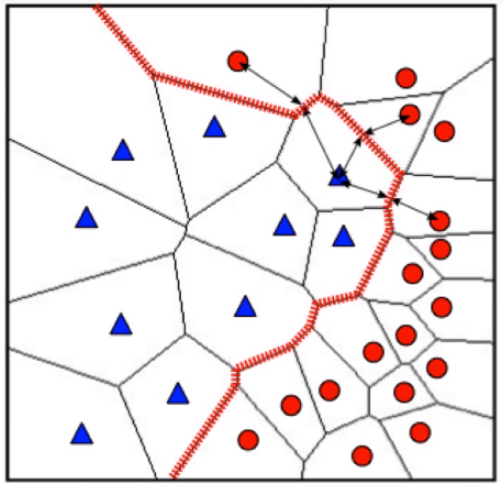

- Como podemos visualizar, um aspecto interessante desta separação por células é  a presença de fronteiras que delimitam a separação entre as classes de dados, desta forma, um dos aspectos mais complicados desta técnica é a sensibilidade aos outliers, já que podem distorcer a fronteira de decisão entre as classes. Uma abordagem para lidar com isso é aumentar o número de vizinhos considerados, o que ajuda a suavizar os efeitos dos outliers.

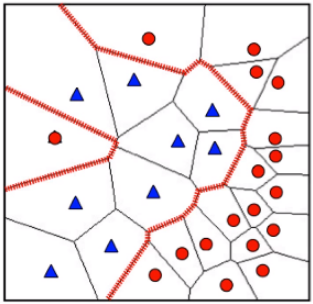

- Um valor de K elevado pode reduzir a precisão do modelo, enquanto um valor de K baixo torna o modelo mais suscetível a outliers, levando a classificações incorretas. A escolha de K deve visar à generalização ideal do modelo.

## Construção do algoritmo  
### Dicionário dos dados

- CPF:
    - Descrição: Número de identificação do investidor.
    - Tipo: Inteiro.

- Perfil do Investidor:
    - Descrição: Classificação do investidor como Conservador, Moderado ou Agressivo.
    - Tipo: String.

- Carteira de Investimento:
    - Descrição: Representação dos investimentos do cliente, uma tupla contendo valores associados a diferentes categorias de investimentos.
    - Tipo: Tupla.




### Dados 

In [1]:
data = [[66707599984, 'Conservador', (5100., 3500., 1400., 200.)],
 [55695397315, 'Conservador', (4900., 3000., 1400., 200.)],
 [63743886918, 'Conservador', (4700., 3200., 1300., 200.)],
 [55941368774, 'Conservador', (4600., 3100., 1500., 200.)],
 [75486280874, 'Conservador', (5000., 3600., 1400., 200.)],
 [53164949799, 'Conservador', (5400., 3900., 1700., 400.)],
 [39898704131, 'Conservador', (4600., 3400., 1400., 300.)],
 [53740901207, 'Conservador', (5000., 3400., 1500., 200.)],
 [51735950236, 'Conservador', (4400., 2900., 1400., 200.)],
 [47305108951, 'Conservador', (4900., 3100., 1500., 100.)],
 [63858864633, 'Conservador', (5400., 3700., 1500., 200.)],
 [53363167240, 'Conservador', (4800., 3400., 1600., 200.)],
 [72133754195, 'Conservador', (4800., 3000., 1400., 100.)],
 [52802483512, 'Conservador', (4300., 3000., 1100., 100.)],
 [57925287214, 'Conservador', (4800., 3400., 1900., 200.)],
 [74354632224, 'Conservador', (5000., 3000., 1600., 200.)],
 [64020216626, 'Conservador', (5000., 3400., 1600., 400.)],
 [78223722856, 'Conservador', (5200., 3500., 1500., 200.)],
 [58245228846, 'Conservador', (5200., 3400., 1400., 200.)],
 [74490686776, 'Conservador', (4700., 3200., 1600., 200.)],
 [48646824781, 'Conservador', (4800., 3100., 1600., 200.)],
 [77381458676, 'Conservador', (5400., 3400., 1500., 400.)],
 [41615431874, 'Conservador', (5200., 4100., 1500., 100.)],
 [52163844491, 'Conservador', (5500., 4200., 1400., 200.)],
 [70276304567, 'Conservador', (4900., 3100., 1500., 200.)],
 [69119828185, 'Conservador', (5000., 3200., 1200., 200.)],
 [65441690046, 'Conservador', (5500., 3500., 1300., 200.)],
 [56457227894, 'Conservador', (4900., 3600., 1400., 100.)],
 [46939428126, 'Conservador', (4400., 3000., 1300., 200.)],
 [60979942480, 'Conservador', (5100., 3400., 1500., 200.)],
 [41648583220, 'Conservador', (5000., 3500., 1300., 300.)],
 [50376331791, 'Conservador', (4500., 2300., 1300., 300.)],
 [67008801023, 'Conservador', (4400., 3200., 1300., 200.)],
 [72149193419, 'Conservador', (5000., 3500., 1600., 600.)],
 [62830733382, 'Conservador', (5100., 3800., 1900., 400.)],
 [56716675811, 'Conservador', (4800., 3000., 1400., 300.)],
 [61089667146, 'Conservador', (5100., 3800., 1600., 200.)],
 [47795509468, 'Conservador', (4600., 3200., 1400., 200.)],
 [60899885693, 'Conservador', (5300., 3700., 1500., 200.)],
 [53433670705, 'Conservador', (5000., 3300., 1400., 200.)],
 [54850120580, 'Moderado', (7000., 3200., 4700., 1400.)],
 [71457789994, 'Moderado', (6400., 3200., 4500., 1500.)],
 [67692777563, 'Moderado', (6900., 3100., 4900., 1500.)],
 [43133573182, 'Moderado', (5500., 2300., 4000., 1300.)],
 [55150612815, 'Moderado', (6500., 2800., 4600., 1500.)],
 [48211725243, 'Moderado', (5700., 2800., 4500., 1300.)],
 [76686463776, 'Moderado', (6300., 3300., 4700., 1600.)],
 [71971000560, 'Moderado', (4900., 2400., 3300., 1000.)],
 [40307235992, 'Moderado', (6600., 2900., 4600., 1300.)],
 [44826533081, 'Moderado', (5200., 2700., 3900., 1400.)],
 [45735414894, 'Moderado', (5900., 3200., 4800., 1800.)],
 [57137146514, 'Moderado', (6100., 2800., 4000., 1300.)],
 [53657058251, 'Moderado', (6300., 2500., 4900., 1500.)],
 [52941460485, 'Moderado', (6100., 2800., 4700., 1200.)],
 [44306600683, 'Moderado', (6400., 2900., 4300., 1300.)],
 [43460747924, 'Moderado', (6600., 3000., 4400., 1400.)],
 [75590376075, 'Moderado', (6800., 2800., 4800., 1400.)],
 [68267282206, 'Moderado', (6700., 3000., 5000., 1700.)],
 [77567920298, 'Moderado', (6000., 2900., 4500., 1500.)],
 [67600419504, 'Moderado', (5700., 2600., 3500., 1000.)],
 [44902189811, 'Moderado', (5500., 2400., 3800., 1100.)],
 [62966866614, 'Moderado', (5500., 2400., 3700., 1000.)],
 [56182108880, 'Moderado', (5800., 2700., 3900., 1200.)],
 [78299785392, 'Moderado', (6000., 2700., 5100., 1600.)],
 [45206071878, 'Moderado', (5400., 3000., 4500., 1500.)],
 [57381925887, 'Moderado', (6000., 3400., 4500., 1600.)],
 [65654934891, 'Moderado', (6700., 3100., 4700., 1500.)],
 [56130640481, 'Moderado', (6300., 2300., 4400., 1300.)],
 [59667611672, 'Moderado', (5600., 3000., 4100., 1300.)],
 [40349334385, 'Moderado', (5500., 2500., 4000., 1300.)],
 [68422640081, 'Moderado', (5500., 2600., 4400., 1200.)],
 [55245923439, 'Moderado', (6100., 3000., 4600., 1400.)],
 [51286696873, 'Moderado', (5800., 2600., 4000., 1200.)],
 [41065279767, 'Moderado', (5000., 2300., 3300., 1000.)],
 [42866454119, 'Moderado', (5600., 2700., 4200., 1300.)],
 [61962944542, 'Moderado', (5700., 3000., 4200., 1200.)],
 [48623501235, 'Moderado', (5700., 2900., 4200., 1300.)],
 [49475220139, 'Moderado', (6200., 2900., 4300., 1300.)],
 [52245218531, 'Moderado', (5100., 2500., 3000., 1100.)],
 [50932926697, 'Moderado', (5700., 2800., 4100., 1300.)],
 [47432932248, 'Agressivo', (6300., 3300., 6000., 2500.)],
 [39321991579, 'Agressivo', (5800., 2700., 5100., 1900.)],
 [46283759608, 'Agressivo', (7100., 3000., 5900., 2100.)],
 [56996272538, 'Agressivo', (6300., 2900., 5600., 1800.)],
 [77232189978, 'Agressivo', (6500., 3000., 5800., 2200.)],
 [77183282421, 'Agressivo', (7600., 3000., 6600., 2100.)],
 [42857147573, 'Agressivo', (4900., 2500., 4500., 1700.)],
 [39331584043, 'Agressivo', (7300., 2900., 6300., 1800.)],
 [48130345228, 'Agressivo', (6700., 2500., 5800., 1800.)],
 [71422443953, 'Agressivo', (7200., 3600., 6100., 2500.)],
 [72508507904, 'Agressivo', (6900., 3200., 5700., 2300.)],
 [41188727558, 'Agressivo', (5600., 2800., 4900., 2000.)],
 [61358776640, 'Agressivo', (7700., 2800., 6700., 2000.)],
 [66934042323, 'Agressivo', (6300., 2700., 4900., 1800.)],
 [40622495567, 'Agressivo', (6700., 3300., 5700., 2100.)],
 [57221661311, 'Agressivo', (7200., 3200., 6000., 1800.)],
 [45159362930, 'Agressivo', (6200., 2800., 4800., 1800.)],
 [45018975174, 'Agressivo', (6100., 3000., 4900., 1800.)],
 [70685429140, 'Agressivo', (6400., 2800., 5600., 2100.)],
 [61808723477, 'Agressivo', (7200., 3000., 5800., 1600.)],
 [56363906548, 'Agressivo', (7400., 2800., 6100., 1900.)],
 [39646194720, 'Agressivo', (7900., 3800., 6400., 2000.)],
 [55385494438, 'Agressivo', (6400., 2800., 5600., 2200.)],
 [75796138061, 'Agressivo', (6300., 2800., 5100., 1500.)],
 [53595767857, 'Agressivo', (6100., 2600., 5600., 1400.)],
 [48758828080, 'Agressivo', (7700., 3000., 6100., 2300.)],
 [58387651356, 'Agressivo', (6300., 3400., 5600., 2400.)],
 [72846931192, 'Agressivo', (6400., 3100., 5500., 1800.)],
 [47046896346, 'Agressivo', (6000., 3000., 4800., 1800.)],
 [69730292799, 'Agressivo', (6900., 3100., 5400., 2100.)],
 [48177836349, 'Agressivo', (6700., 3100., 5600., 2400.)],
 [57976326635, 'Agressivo', (6900., 3100., 5100., 2300.)],
 [55710813002, 'Agressivo', (5800., 2700., 5100., 1900.)],
 [64028580439, 'Agressivo', (6800., 3200., 5900., 2300.)],
 [49962942971, 'Agressivo', (6700., 3300., 5700., 2500.)],
 [47250893163, 'Agressivo', (6700., 3000., 5200., 2300.)],
 [75559276274, 'Agressivo', (6300., 2500., 5000., 1900.)],
 [58529878272, 'Agressivo', (6500., 3000., 5200., 2000.)],
 [76005896622, 'Agressivo', (6200., 3400., 5400., 2300.)],
 [49212614633, 'Agressivo', (5900., 3000., 5100., 1800.)]]

In [2]:
no_class = [[45926320819, '', (5800., 4000., 1200., 200.)],
 [52559670741, '', (5700., 4400., 1500., 400.)],
 [59016004832, '', (5400., 3900., 1300., 400.)],
 [66175672425, '', (5100., 3500., 1400., 300.)],
 [53330429526, '', (5700., 3800., 1700., 300.)],
 [43765563403, '', (5100., 3800., 1500., 300.)],
 [68020822591, '', (5400., 3400., 1700., 200.)],
 [53939481689, '', (5100., 3700., 1500., 400.)],
 [47014057561, '', (4600., 3600., 1000., 200.)],
 [57183542047, '', (5100., 3300., 1700., 500.)],

 [68518284363, '', (5000., 2000., 3500., 1000.)],
 [65806049885, '', (5900., 3000., 4200., 1500.)],
 [54128073086, '', (6000., 2200., 4000., 1000.)],
 [41306785494, '', (6100., 2900., 4700., 1400.)],
 [65234831039, '', (5600., 2900., 3600., 1300.)],
 [50964498067, '', (6700., 3100., 4400., 1400.)],
 [50810951429, '', (5600., 3000., 4500., 1500.)],
 [48765044397, '', (5800., 2700., 4100., 1000.)],
 [41960083761, '', (6200., 2200., 4500., 1500.)],
 [76657763082, '', (5600., 2500., 3900., 1100.)],

 [64726487742, '', (6500., 3200., 5100., 2000.)],
 [75746566283, '', (6400., 2700., 5300., 1900.)],
 [78576734793, '', (6800., 3000., 5500., 2100.)],
 [56440141847, '', (5700., 2500., 5000., 2000.)],
 [66827423000, '', (5800., 2800., 5100., 2400.)],
 [45267873396, '', (6400., 3200., 5300., 2300.)],
 [46387191493, '', (6500., 3000., 5500., 1800.)],
 [54273611732, '', (7700., 3800., 6700., 2200.)],
 [75135392881, '', (7700., 2600., 6900., 2300.)],
 [64703873108, '', (6000., 2200., 5000., 1500.)]]

## Transformando os dados

**1 - Para facilitar o cálculo da distância euclidiana, vamos converter a lista de listas em uma única lista de tuplas e também remover o CPF e a classificação.** 

Sabemos que a cada 40 clientes, há uma classificação específica em relação ao perfil de investimento: **Conservador, Moderado e Agressivo, respectivamente.**

In [3]:
#Removendo cpf e classificação com slicing
dados = []
for linha in data:
    dados_limpos = linha[2:5]
    dados.append(dados_limpos)

In [4]:
dados

[[(5100.0, 3500.0, 1400.0, 200.0)],
 [(4900.0, 3000.0, 1400.0, 200.0)],
 [(4700.0, 3200.0, 1300.0, 200.0)],
 [(4600.0, 3100.0, 1500.0, 200.0)],
 [(5000.0, 3600.0, 1400.0, 200.0)],
 [(5400.0, 3900.0, 1700.0, 400.0)],
 [(4600.0, 3400.0, 1400.0, 300.0)],
 [(5000.0, 3400.0, 1500.0, 200.0)],
 [(4400.0, 2900.0, 1400.0, 200.0)],
 [(4900.0, 3100.0, 1500.0, 100.0)],
 [(5400.0, 3700.0, 1500.0, 200.0)],
 [(4800.0, 3400.0, 1600.0, 200.0)],
 [(4800.0, 3000.0, 1400.0, 100.0)],
 [(4300.0, 3000.0, 1100.0, 100.0)],
 [(4800.0, 3400.0, 1900.0, 200.0)],
 [(5000.0, 3000.0, 1600.0, 200.0)],
 [(5000.0, 3400.0, 1600.0, 400.0)],
 [(5200.0, 3500.0, 1500.0, 200.0)],
 [(5200.0, 3400.0, 1400.0, 200.0)],
 [(4700.0, 3200.0, 1600.0, 200.0)],
 [(4800.0, 3100.0, 1600.0, 200.0)],
 [(5400.0, 3400.0, 1500.0, 400.0)],
 [(5200.0, 4100.0, 1500.0, 100.0)],
 [(5500.0, 4200.0, 1400.0, 200.0)],
 [(4900.0, 3100.0, 1500.0, 200.0)],
 [(5000.0, 3200.0, 1200.0, 200.0)],
 [(5500.0, 3500.0, 1300.0, 200.0)],
 [(4900.0, 3600.0, 1400.0, 1

In [5]:
#Convertendo lista de listas de tuplas em uma lista plana de tuplas
dados_1 = []
for lista in dados:
    dados_1.extend(lista)

In [6]:
dados_1

[(5100.0, 3500.0, 1400.0, 200.0),
 (4900.0, 3000.0, 1400.0, 200.0),
 (4700.0, 3200.0, 1300.0, 200.0),
 (4600.0, 3100.0, 1500.0, 200.0),
 (5000.0, 3600.0, 1400.0, 200.0),
 (5400.0, 3900.0, 1700.0, 400.0),
 (4600.0, 3400.0, 1400.0, 300.0),
 (5000.0, 3400.0, 1500.0, 200.0),
 (4400.0, 2900.0, 1400.0, 200.0),
 (4900.0, 3100.0, 1500.0, 100.0),
 (5400.0, 3700.0, 1500.0, 200.0),
 (4800.0, 3400.0, 1600.0, 200.0),
 (4800.0, 3000.0, 1400.0, 100.0),
 (4300.0, 3000.0, 1100.0, 100.0),
 (4800.0, 3400.0, 1900.0, 200.0),
 (5000.0, 3000.0, 1600.0, 200.0),
 (5000.0, 3400.0, 1600.0, 400.0),
 (5200.0, 3500.0, 1500.0, 200.0),
 (5200.0, 3400.0, 1400.0, 200.0),
 (4700.0, 3200.0, 1600.0, 200.0),
 (4800.0, 3100.0, 1600.0, 200.0),
 (5400.0, 3400.0, 1500.0, 400.0),
 (5200.0, 4100.0, 1500.0, 100.0),
 (5500.0, 4200.0, 1400.0, 200.0),
 (4900.0, 3100.0, 1500.0, 200.0),
 (5000.0, 3200.0, 1200.0, 200.0),
 (5500.0, 3500.0, 1300.0, 200.0),
 (4900.0, 3600.0, 1400.0, 100.0),
 (4400.0, 3000.0, 1300.0, 200.0),
 (5100.0, 3400

**2 - Dado que o dataset possui apenas 30 dados sem classificação, vamos selecionar também 10 dados por categoria para compor nosso conjunto de treinamento** 

In [7]:
#Utilizando slicing para selecionar os dados
parte1 = dados_1[0:10]  #Conservador
parte2 = dados_1[50:60] #Moderado
parte3 = dados_1[110:120] #Agressivo

In [8]:
len(parte3)

10

In [9]:
#Juntando cada parte
dados_treino = parte1 + parte2 + parte3

In [10]:
#Verificando os dados de treino
dados_treino

[(5100.0, 3500.0, 1400.0, 200.0),
 (4900.0, 3000.0, 1400.0, 200.0),
 (4700.0, 3200.0, 1300.0, 200.0),
 (4600.0, 3100.0, 1500.0, 200.0),
 (5000.0, 3600.0, 1400.0, 200.0),
 (5400.0, 3900.0, 1700.0, 400.0),
 (4600.0, 3400.0, 1400.0, 300.0),
 (5000.0, 3400.0, 1500.0, 200.0),
 (4400.0, 2900.0, 1400.0, 200.0),
 (4900.0, 3100.0, 1500.0, 100.0),
 (5900.0, 3200.0, 4800.0, 1800.0),
 (6100.0, 2800.0, 4000.0, 1300.0),
 (6300.0, 2500.0, 4900.0, 1500.0),
 (6100.0, 2800.0, 4700.0, 1200.0),
 (6400.0, 2900.0, 4300.0, 1300.0),
 (6600.0, 3000.0, 4400.0, 1400.0),
 (6800.0, 2800.0, 4800.0, 1400.0),
 (6700.0, 3000.0, 5000.0, 1700.0),
 (6000.0, 2900.0, 4500.0, 1500.0),
 (5700.0, 2600.0, 3500.0, 1000.0),
 (6700.0, 3100.0, 5600.0, 2400.0),
 (6900.0, 3100.0, 5100.0, 2300.0),
 (5800.0, 2700.0, 5100.0, 1900.0),
 (6800.0, 3200.0, 5900.0, 2300.0),
 (6700.0, 3300.0, 5700.0, 2500.0),
 (6700.0, 3000.0, 5200.0, 2300.0),
 (6300.0, 2500.0, 5000.0, 1900.0),
 (6500.0, 3000.0, 5200.0, 2000.0),
 (6200.0, 3400.0, 5400.0, 2300

In [11]:
#Tamamho dos dados treino
len(dados_treino)

30

**3 - Vamos realizar as mesmas transformações nos dados sem classificação:**

In [12]:
#Removendo cpf com slicing
dados_noclass = []
for linha in no_class:
    dados_limpos_a = linha[2:5]
    dados_noclass.append(dados_limpos_a)   

In [13]:
#Convertendo lista de listas de tuplas em uma lista plana de tuplas
dados_sem_class = []
for lista in dados_noclass:
    dados_sem_class.extend(lista)

In [14]:
#Verificando os dados sem classificação
dados_sem_class

[(5800.0, 4000.0, 1200.0, 200.0),
 (5700.0, 4400.0, 1500.0, 400.0),
 (5400.0, 3900.0, 1300.0, 400.0),
 (5100.0, 3500.0, 1400.0, 300.0),
 (5700.0, 3800.0, 1700.0, 300.0),
 (5100.0, 3800.0, 1500.0, 300.0),
 (5400.0, 3400.0, 1700.0, 200.0),
 (5100.0, 3700.0, 1500.0, 400.0),
 (4600.0, 3600.0, 1000.0, 200.0),
 (5100.0, 3300.0, 1700.0, 500.0),
 (5000.0, 2000.0, 3500.0, 1000.0),
 (5900.0, 3000.0, 4200.0, 1500.0),
 (6000.0, 2200.0, 4000.0, 1000.0),
 (6100.0, 2900.0, 4700.0, 1400.0),
 (5600.0, 2900.0, 3600.0, 1300.0),
 (6700.0, 3100.0, 4400.0, 1400.0),
 (5600.0, 3000.0, 4500.0, 1500.0),
 (5800.0, 2700.0, 4100.0, 1000.0),
 (6200.0, 2200.0, 4500.0, 1500.0),
 (5600.0, 2500.0, 3900.0, 1100.0),
 (6500.0, 3200.0, 5100.0, 2000.0),
 (6400.0, 2700.0, 5300.0, 1900.0),
 (6800.0, 3000.0, 5500.0, 2100.0),
 (5700.0, 2500.0, 5000.0, 2000.0),
 (5800.0, 2800.0, 5100.0, 2400.0),
 (6400.0, 3200.0, 5300.0, 2300.0),
 (6500.0, 3000.0, 5500.0, 1800.0),
 (7700.0, 3800.0, 6700.0, 2200.0),
 (7700.0, 2600.0, 6900.0, 2300

## Cálculo da Distância Euclidiana

In [15]:
def distancia_euclidiana(treino, teste):
    distancias = []
    for i in range(len(treino)): # Iterando sobre as 30 listas dos dados de treino
        soma_distancia = 0  
        for j in range(len(treino[i])): # Iterando sobre cada elemento em cada lista nos dados de treino
            diferenca = (treino[i][j] - teste[j])**2 #Calculando para cada elemento correspondente entre treino/teste
            soma_distancia += diferenca  
        soma_distancia = soma_distancia**0.5
        distancias.append(soma_distancia) 
    return distancias

In [16]:
dados_sem_class[0]

(5800.0, 4000.0, 1200.0, 200.0)

In [17]:
#Testando o primeiro dado não classificado para todos os dados de treino
primeiro_ponto = distancia_euclidiana(dados_treino, dados_sem_class[0])

In [18]:
len(primeiro_ponto)

30

In [19]:
#Desta forma cada ponto dos dados não classificados terá 30 distâncias
primeiro_ponto

[883.1760866327846,
 1360.1470508735442,
 1363.8181696985855,
 1529.7058540778355,
 916.515138991168,
 678.2329983125268,
 1360.1470508735442,
 1044.030650891055,
 1791.6472867168918,
 1311.4877048604,
 4021.19385257662,
 3252.6911934581185,
 4228.474902373195,
 3844.4765573482173,
 3519.9431813596084,
 3649.6575181789317,
 4103.656905736638,
 4301.162633521313,
 3718.87079635741,
 2810.693864511039,
 5081.338406365,
 4651.881339845203,
 4448.595283907045,
 5304.714883949938,
 5180.733538795447,
 4713.80949975707,
 4453.0888156424635,
 4553.020975132884,
 4750.789408087881,
 4333.58973600409]

## Verificando os vizinhos mais próximos

In [20]:
def vizinhos(distancias, k):
    rotulos_treinamento = ['Conservador'] * 10 + ['Moderado'] * 10 + ['Agressivo'] * 10 #Gerando os rótulos
    distancias_classificacao = zip(distancias, rotulos_treinamento) #Vamos rotular antes de ordenar as distâncias
    distancias_classificacao = list(distancias_classificacao)
    distancias_classificacao.sort() #ordenando as distâncias
    vizinhos_proximos = distancias_classificacao[:k] #Selecionando os k elementos mais próximos
    return vizinhos_proximos

In [21]:
# Os quatro vizinhos mais próximos do primeiro ponto
vizinhos(primeiro_ponto,4)

[(678.2329983125268, 'Conservador'),
 (883.1760866327846, 'Conservador'),
 (916.515138991168, 'Conservador'),
 (1044.030650891055, 'Conservador')]

## Fazendo uma função maior que englobe as duas funções criadas anteriormente para percorrer todos as listas do treino para cada lista dos dados sem classificação.

In [22]:
def classificacao(treino, teste, k):
    distancia_geral = []
    for indice in range(len(teste)): # Percorre os índices da lista teste 
        distancias = distancia_euclidiana(treino, teste[indice]) #Chamando função distancia_euclidiana p/uma única lista teste.
        vizinhos_proximos = vizinhos(distancias, k, indice)  # Chamando a função para encontrar os vizinhos mais próximos
        distancia_geral.append(vizinhos_proximos) 
    return distancia_geral

def distancia_euclidiana(treino, teste):# A função está sendo chamada com os argumentos passados na função anterior
    distancias = []
    for i in range(len(treino)): # Iterando sobre as 30 listas do dataset treino
        soma_distancia = 0  
        for j in range(len(treino[i])): # Iterando sobre cada elemento em cada lista do treino
            diferenca = (treino[i][j] - teste[j])**2 #Calculando para cada elemento correspondente entre treino/teste
            soma_distancia += diferenca  # A linha acima e esta são parte desta equação: √(x2−x1)² +(y2−y1)² +(z2−z1)²...
        soma_distancia = round(soma_distancia**0.5,2) #Aplicando raiz quadrada e arredondando para ficar mais légivel
        distancias.append(soma_distancia) 
    return distancias

def vizinhos(distancias, k, indice): #Entrada com a lista de distancia, k  e linha teste
    rotulos_treinamento = ['C'] * 10 + ['M'] * 10 + ['A'] * 10 #Para ficar mais legível na saída, adotamos: C, M,  A
    distancias_classificacao = zip(distancias, rotulos_treinamento) 
    distancias_classificacao = list(distancias_classificacao)
    distancias_classificacao.sort() #ordenando as distâncias
    vizinhos_proximos = distancias_classificacao[:k] #Selecionando os k elementos mais próximos
    return f'{indice+1}º linha, os vizinhos próximos são {vizinhos_proximos}'

In [23]:
primeira_verificacao = classificacao(dados_treino, dados_sem_class, 3 )
primeira_verificacao[0:10]

["1º linha, os vizinhos próximos são [(678.23, 'C'), (883.18, 'C'), (916.52, 'C')]",
 "2º linha, os vizinhos próximos são [(616.44, 'C'), (1086.28, 'C'), (1104.54, 'C')]",
 "3º linha, os vizinhos próximos são [(400.0, 'C'), (547.72, 'C'), (547.72, 'C')]",
 "4º linha, os vizinhos próximos são [(100.0, 'C'), (173.21, 'C'), (200.0, 'C')]",
 "5º linha, os vizinhos próximos são [(331.66, 'C'), (741.62, 'C'), (793.73, 'C')]",
 "6º linha, os vizinhos próximos são [(264.58, 'C'), (331.66, 'C'), (387.3, 'C')]",
 "7º linha, os vizinhos próximos são [(435.89, 'C'), (447.21, 'C'), (538.52, 'C')]",
 "8º linha, os vizinhos próximos são [(264.58, 'C'), (300.0, 'C'), (374.17, 'C')]",
 "9º linha, os vizinhos próximos são [(458.26, 'C'), (509.9, 'C'), (565.69, 'C')]",
 "10º linha, os vizinhos próximos são [(387.3, 'C'), (469.04, 'C'), (529.15, 'C')]"]

### Verificamos que os 10 primeiros foram classificados como conservador;


In [24]:
segunda_verificacao = classificacao(dados_treino, dados_sem_class, 3 )
segunda_verificacao[10:20]

["11º linha, os vizinhos próximos são [(921.95, 'M'), (1479.86, 'M'), (1749.29, 'M')]",
 "12º linha, os vizinhos próximos são [(331.66, 'M'), (400.0, 'M'), (556.78, 'M')]",
 "13º linha, os vizinhos próximos são [(678.23, 'M'), (707.11, 'M'), (911.04, 'M')]",
 "14º linha, os vizinhos próximos são [(223.61, 'M'), (244.95, 'M'), (500.0, 'M')]",
 "15º linha, os vizinhos próximos são [(447.21, 'M'), (648.07, 'M'), (1004.99, 'M')]",
 "16º linha, os vizinhos próximos são [(141.42, 'M'), (387.3, 'M'), (509.9, 'M')]",
 "17º linha, os vizinhos próximos são [(412.31, 'M'), (556.78, 'M'), (648.07, 'M')]",
 "18º linha, os vizinhos próximos são [(447.21, 'M'), (616.44, 'M'), (700.0, 'M')]",
 "19º linha, os vizinhos próximos são [(509.9, 'M'), (707.11, 'M'), (714.14, 'A')]",
 "20º linha, os vizinhos próximos são [(435.89, 'M'), (624.5, 'M'), (916.52, 'M')]"]

### Verificamos que os outros dez dados foram classificados como moderado;

In [25]:
terceira_verificacao = classificacao(dados_treino, dados_sem_class, 3 )
terceira_verificacao[20:30]

["21º linha, os vizinhos próximos são [(223.61, 'A'), (424.26, 'A'), (424.26, 'M')]",
 "22º linha, os vizinhos próximos são [(346.41, 'A'), (374.17, 'A'), (556.78, 'M')]",
 "23º linha, os vizinhos próximos são [(346.41, 'A'), (374.17, 'A'), (435.89, 'A')]",
 "24º linha, os vizinhos próximos são [(264.58, 'A'), (583.1, 'A'), (608.28, 'A')]",
 "25º linha, os vizinhos próximos são [(509.9, 'A'), (640.31, 'A'), (774.6, 'A')]",
 "26º linha, os vizinhos próximos são [(300.0, 'A'), (374.17, 'A'), (387.3, 'A')]",
 "27º linha, os vizinhos próximos são [(360.56, 'A'), (547.72, 'M'), (616.44, 'A')]",
 "28º linha, os vizinhos próximos são [(1349.07, 'A'), (1529.71, 'A'), (1655.29, 'A')]",
 "29º linha, os vizinhos próximos são [(1473.09, 'A'), (1717.56, 'A'), (1723.37, 'A')]",
 "30º linha, os vizinhos próximos são [(435.89, 'M'), (583.1, 'A'), (678.23, 'A')]"]

## Parece que precisamos revisitar o número de vizinhos em nosso modelo para melhorar sua eficácia. Ao analisar os resultados das classificações, notamos que alguns dados foram classificados de forma moderada, sugerindo que talvez precisemos aumentar o número de vizinhos considerados durante o processo de classificação.

In [26]:
quarta_verificacao = classificacao(dados_treino, dados_sem_class, 5 )
quarta_verificacao[20:30]

["21º linha, os vizinhos próximos são [(223.61, 'A'), (424.26, 'A'), (424.26, 'M'), (509.9, 'A'), (556.78, 'A')]",
 "22º linha, os vizinhos próximos são [(346.41, 'A'), (374.17, 'A'), (556.78, 'M'), (591.61, 'A'), (608.28, 'M')]",
 "23º linha, os vizinhos próximos são [(346.41, 'A'), (374.17, 'A'), (435.89, 'A'), (469.04, 'A'), (489.9, 'A')]",
 "24º linha, os vizinhos próximos são [(264.58, 'A'), (583.1, 'A'), (608.28, 'A'), (781.02, 'M'), (787.4, 'M')]",
 "25º linha, os vizinhos próximos são [(509.9, 'A'), (640.31, 'A'), (774.6, 'A'), (787.4, 'A'), (787.4, 'M')]",
 "26º linha, os vizinhos próximos são [(300.0, 'A'), (374.17, 'A'), (387.3, 'A'), (447.21, 'A'), (547.72, 'A')]",
 "27º linha, os vizinhos próximos são [(360.56, 'A'), (547.72, 'M'), (616.44, 'A'), (648.07, 'A'), (714.14, 'A')]",
 "28º linha, os vizinhos próximos são [(1349.07, 'A'), (1529.71, 'A'), (1655.29, 'A'), (1923.54, 'A'), (1974.84, 'A')]",
 "29º linha, os vizinhos próximos são [(1473.09, 'A'), (1717.56, 'A'), (1723.

### Após análise anterior, observamos que os últimos nove casos podem ser classificados como agressivos. No entanto, o último caso apresenta características de perfil moderado em comparação com os anteriores.